In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
import joblib

In [3]:
import glob

In [4]:
fns = glob.glob('/home/gjones/2016-06-18_21[23]*.pkl')
fns = glob.glob('/home/gjones/2016-06-21*.pkl')
fns.sort()
print fns

['/home/gjones/2016-06-21_112639_scan_lo_830.0_MHz.nc_resonators.pkl', '/home/gjones/2016-06-21_112721_scan_lo_1020.0_MHz.nc_resonators.pkl', '/home/gjones/2016-06-21_112802_scan_lo_1210.0_MHz.nc_resonators.pkl', '/home/gjones/2016-06-21_112844_scan_lo_1400.0_MHz.nc_resonators.pkl']


In [5]:
alldata = [joblib.load(fn) for fn in fns]

In [6]:
len(alldata)

4

In [7]:
resonators = [data['results'] for data in alldata]

In [8]:
import itertools

In [9]:
resonators = list(itertools.chain.from_iterable(resonators))

In [10]:
len(resonators)

258

In [11]:
resonators[0]

Parameters([('delay',
             <Parameter 'delay', 1.0249826810441769e-06, bounds=[-inf:inf]>),
            ('phi',
             <Parameter 'phi', 2.5601761522703681, bounds=[-3.141592653589793:3.141592653589793]>),
            ('f_min',
             <Parameter 'f_min', value=854062500.0 (fixed), bounds=[-inf:inf]>),
            ('A_mag', <Parameter 'A_mag', 815.03644262253931, bounds=[0:inf]>),
            ('A_slope',
             <Parameter 'A_slope', -1.1740461989395983e-08, bounds=[-inf:inf]>),
            ('f_0',
             <Parameter 'f_0', 854899427.0774889, bounds=[854062500.0:855796875.0]>),
            ('Q',
             <Parameter 'Q', 2707.4630321355044, bounds=[49.296396396396403:54719.0]>),
            ('Q_e_real',
             <Parameter 'Q_e_real', 74204.914586463565, bounds=[1:10000000.0]>),
            ('Q_e_imag',
             <Parameter 'Q_e_imag', -133725.28571895696, bounds=[-10000000.0:10000000.0]>)])

In [12]:
def remove_duplicates(resonators,tolerance=50e3):
    clean = []
    f0s = []
    for p in resonators:
        f0 = p['f_0'].value
        if len(clean) == 0:
            clean.append(p)
            f0s.append(f0)
            continue
        distance = np.abs(f0-np.array(f0s))
        if not np.any(distance < tolerance):
            clean.append(p)
            f0s.append(f0)
        else:
            print "found duplicate of ", f0, "distance", distance.min()

    return clean

In [13]:
resonators = remove_duplicates(resonators)

found duplicate of  883977584.334 distance 20711.7025903
found duplicate of  894728752.192 distance 13.6517068148
found duplicate of  898360298.466 distance 45.9603606462
found duplicate of  900607341.68 distance 622.381828308
found duplicate of  903856848.763 distance 288.183789968
found duplicate of  905187467.896 distance 350.604073286
found duplicate of  907583259.416 distance 5.16742992401
found duplicate of  923800800.985 distance 119.485643029
found duplicate of  925196696.243 distance 62.3514567614
found duplicate of  929964193.789 distance 87.7130579948
found duplicate of  934359026.798 distance 0.935379743576
found duplicate of  958263192.141 distance 127.590994716
found duplicate of  965865786.983 distance 10.06967628
found duplicate of  976925066.294 distance 41.5571836233
found duplicate of  979996421.681 distance 8391.31005549
found duplicate of  981776160.997 distance 519.780125499
found duplicate of  1010980366.53 distance 30.516875267
found duplicate of  1014078814.54 

In [14]:
len(resonators)

151

In [15]:
f0s = np.array([p['f_0'].value for p in resonators])

In [16]:
dset = list(itertools.chain.from_iterable([data['data'] for data in alldata]))

In [17]:
freq = np.concatenate([fse[0] for fse in dset])
s21 = np.concatenate([fse[1] for fse in dset])

<IPython.core.display.Javascript object>


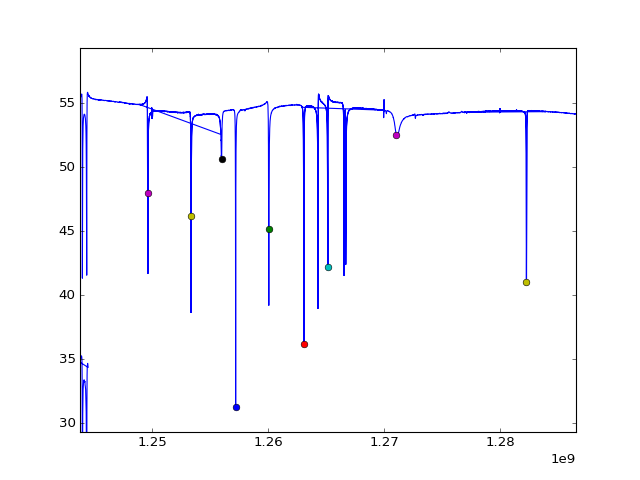

In [18]:
plot(freq,20*np.log10(np.abs(s21)))
for f0 in f0s:
    idx = np.abs(freq-f0).argmin()
    plot(freq[idx],20*np.log10(np.abs(s21[idx])),'o')

In [34]:
1440-440.

1000.0

In [94]:
850+190*4

1610

In [53]:
1440-500.

940.0

In [ ]:
missing = np.array([1162.33e6,
                   1243.71e6,
                    1366.11e6,
                    1623.02e6,
                    1720.7e6, # small
                   ])

In [19]:
bad = np.array([1280e6,
               1344.03e6, 1420e6,
                1536.29e6, # is real but very shallow
                ])
bad = f0s[(f0s>1480e6)|(f0s<850e6)]#,f0s[(f0s>1978e6)&(f0s<1991e6)],f0s[f0s>2000e6]))
#all of 1790 to 1800 is bad
# 1978 to 1991
#everything above 2000

In [20]:
bad

array([  1.49295230e+09,   1.49551064e+09,   1.50000502e+09,
         1.50905490e+09])

In [21]:
bad_resonators = []
good_resonators = []
for p in resonators:
    f0 = p['f_0'].value
    Q = p['Q'].value
    if np.any(np.abs(bad-f0) < 1e6) or Q > 50e3:
        bad_resonators.append(p)
    else:
        good_resonators.append(p)

In [22]:
len(good_resonators)

138

In [23]:
f0s = np.array([p['f_0'].value for p in good_resonators])
Qs = np.array([p['Q'].value for p in good_resonators])
Qers = np.array([p['Q_e_real'].value for p in good_resonators])
Qeis = np.array([p['Q_e_imag'].value for p in good_resonators])
Qes = Qers + 1j*Qeis
order = f0s.argsort()
f0s = f0s[order]
Qs = Qs[order]
Qes = Qes[order]
Qis = 1/(1/Qs-np.real(1/Qes))

In [24]:
rcParams['font.size']=18

<IPython.core.display.Javascript object>


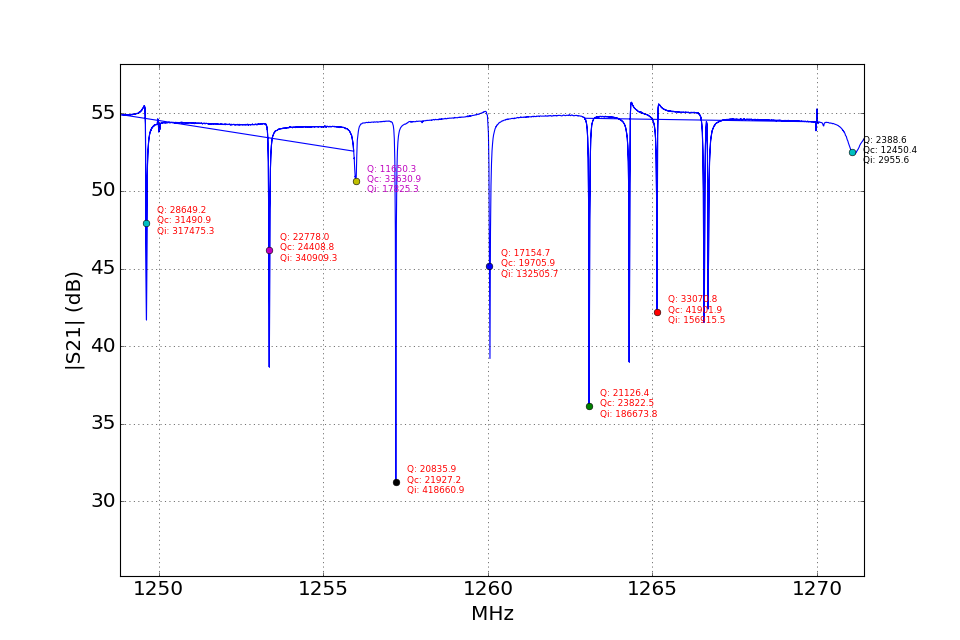

In [25]:
figure(figsize(12,8))
plot(freq/1e6,20*np.log10(np.abs(s21)))
for ridx,f0 in enumerate(f0s):
    if Qis[ridx] > 0:
        if Qis[ridx] < 2000:
            color='gray'
        elif Qis[ridx] < 10e3:
            color='k'
        elif Qis[ridx] < 100e3:
            color='m'
        else:
            color='r'
        idx = np.abs(freq-f0).argmin()
        plot(freq[idx]/1e6,20*np.log10(np.abs(s21[idx])),'o')
        annotate(xy=(freq[idx]/1e6,20*np.log10(np.abs(s21[idx]))), s=('Q: %.1f\nQc: %.1f\nQi: %.1f' % (Qs[ridx],1/np.real(1/Qes[ridx]),Qis[ridx])),
            size=8,textcoords='offset points',xytext=(10,-10),color=color)
grid()
ylabel('|S21| (dB)')
xlabel('MHz')

In [36]:
(Qis>100e3).sum()

32

<IPython.core.display.Javascript object>


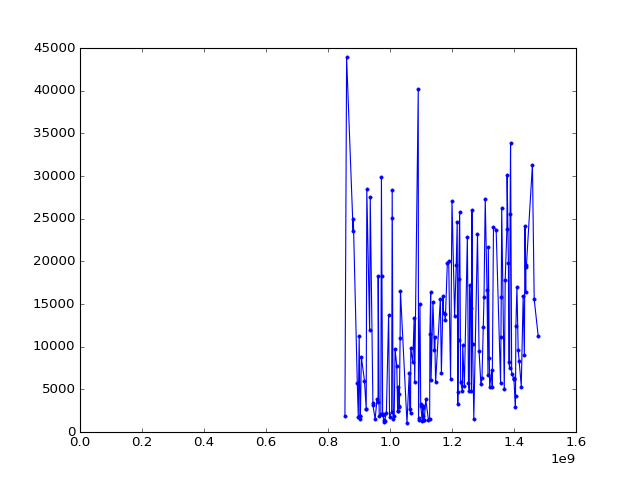

In [24]:
plot(f0s,Qs,'.-')

In [52]:
(Qs>5000).sum()

122

In [37]:
8*31e3

248000.0

<IPython.core.display.Javascript object>


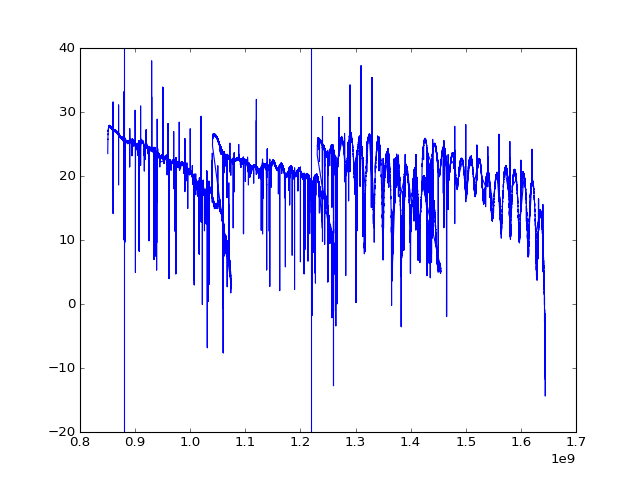

In [53]:
plot(freq,20*np.log10(np.abs(s21)))
for res in good_resonators:
    if res['Q'].value >35e3:
        axvline(res['f_0'].value,color='r')

<IPython.core.display.Javascript object>


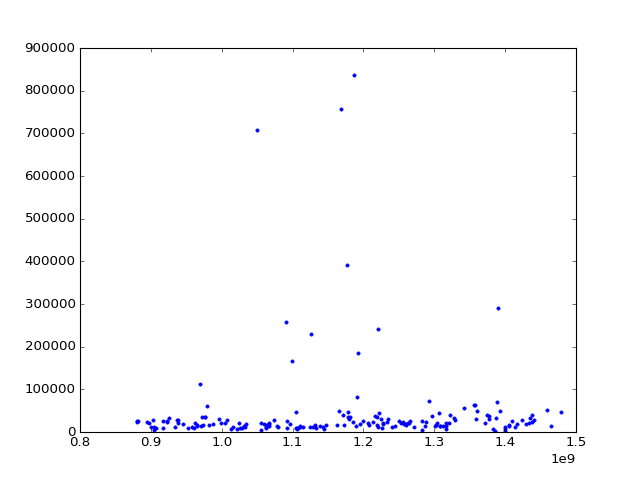

In [30]:
plot(f0s,1/np.real(1/Qers),'.')

In [81]:
import seaborn as sns

In [31]:
h,edges = np.histogram(Qs,bins=100)

<IPython.core.display.Javascript object>


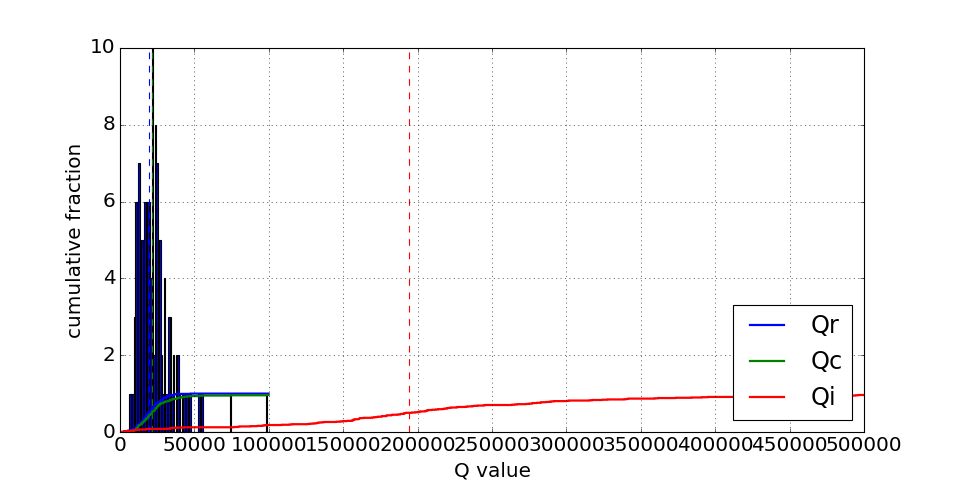

In [27]:
figure(figsize=(12,6))
h,edges = np.histogram(Qs,bins=np.arange(0,100e3,100))
plot(edges[:-1],np.cumsum(h)*1./len(Qs),label='Qr',color='b',lw=2)
axvline(np.median(Qs),color='b',linestyle='--')
h,edges = np.histogram(1/np.real(1/Qers),bins=np.arange(0,100e3,100))
plot(edges[:-1],np.cumsum(h)*1./len(Qs),label='Qc',color='g',lw=2)
axvline(np.median(1/np.real(1/Qers)),color='g',linestyle='--')
h,edges = np.histogram(Qis,bins=np.arange(0,500e3,100))
plot(edges[:-1],np.cumsum(h)*1./len(Qs),label='Qi',color='r',lw=2)
axvline(np.median(Qis),color='r',linestyle='--')
ylabel('cumulative fraction')
xlabel('Q value')
grid()
legend(loc='lower right')
gca().xaxis.set_major_locator(plt.MultipleLocator(50e3))

<IPython.core.display.Javascript object>


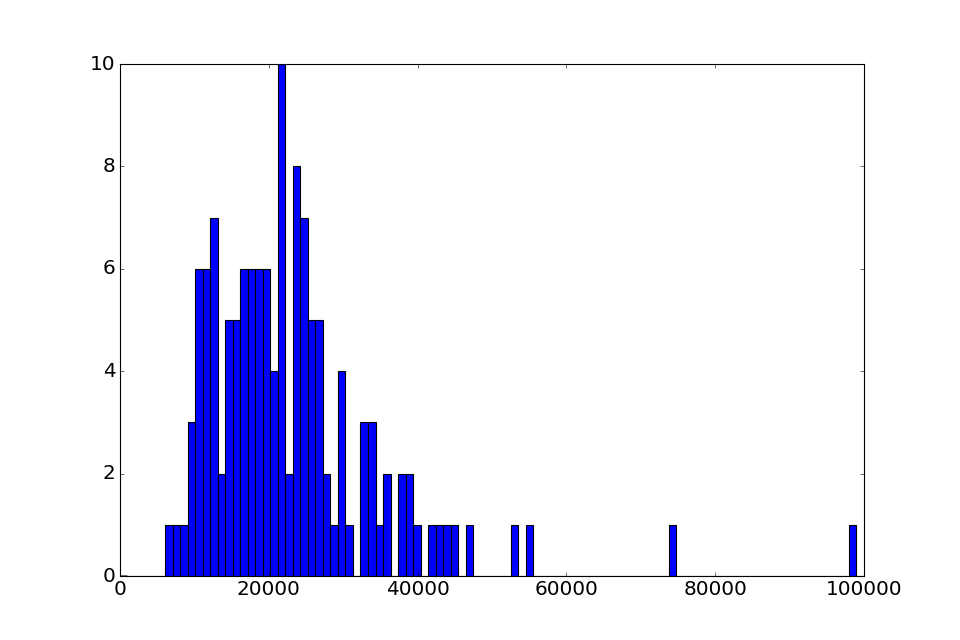

In [29]:
_=hist(1/np.real(1/Qers),bins=np.linspace(0,1e5,100))

<IPython.core.display.Javascript object>


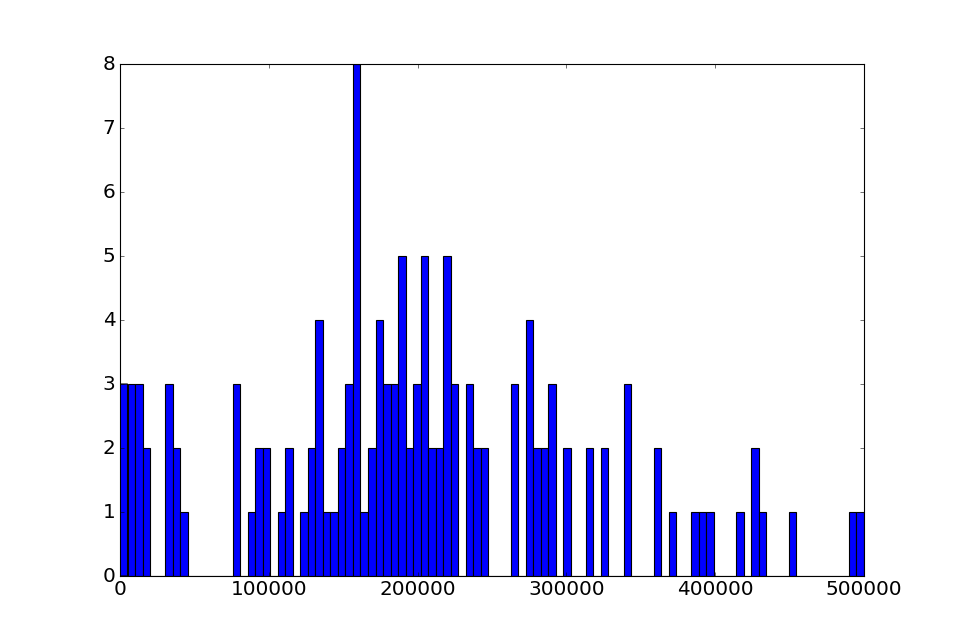

In [32]:
_=hist(Qis,bins=np.linspace(0,5e5,100))

<IPython.core.display.Javascript object>


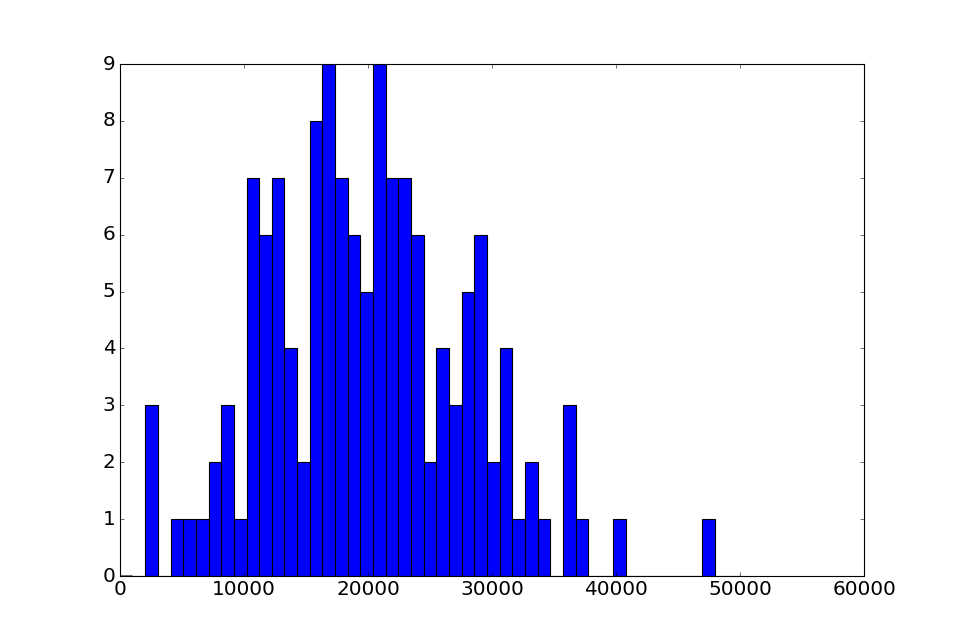

In [33]:
_=hist(Qs,bins=np.linspace(0,5e4,50))

In [54]:
np.diff(f0s/1e6)>.25

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [69]:
f0s[Qis.argsort()][::-1][:32]/1e6

array([ 1032.57197396,  1144.36533197,  1409.45840667,  1377.81714192,
        1162.39874239,  1007.47465216,  1199.94139702,  1307.21217035,
         881.72090535,   880.98676228,  1189.31805888,  1465.11417707,
        1033.63515044,   961.84606637,  1007.070173  ,  1333.81186776,
         936.2911356 ,  1360.29183904,   973.85131755,   907.57569938,
        1371.6403614 ,  1312.88961115,   925.1846604 ,  1459.44165374,
         972.31931782,  1213.59791899,  1264.26159337,  1021.97521337,
        1138.54428881,   900.56985417,  1184.99419999,  1406.09343987])

In [70]:
lo = np.median(f0s)
lo = 1210e6
lomask = (np.abs(f0s-lo)/1e6) < 255
print lomask.sum()

131


In [71]:
initial_lo_1210_list = np.sort(f0s[lomask][np.argsort(Qs[lomask])[-128:]])

In [73]:
np.diff(initial_lo_1210_list).max()

19262176.767569065

In [76]:
np.save('/artemis/readout/resonances/2016-06-18-jpl-hex-271-initial-lo-1210-resonances.npy',initial_lo_1210_list)

<IPython.core.display.Javascript object>


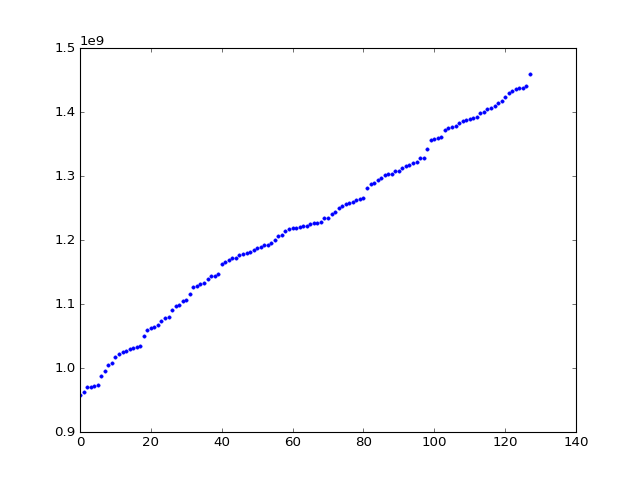

In [75]:
plot(initial_lo_1210_list,'.')

In [71]:
high_qi_1210_list = np.sort(f0s[lomask][np.argsort(Qis[lomask])[-32:]])

In [81]:
high_qi_1210_list[4] += 4e6

In [82]:
high_qi_1210_list

array([  9.61846066e+08,   9.72319318e+08,   9.73851318e+08,
         1.00707017e+09,   1.01147465e+09,   1.02197521e+09,
         1.03257197e+09,   1.03363515e+09,   1.13854429e+09,
         1.14436533e+09,   1.16239874e+09,   1.17264662e+09,
         1.18499420e+09,   1.18931806e+09,   1.19994140e+09,
         1.21359792e+09,   1.22464010e+09,   1.24955659e+09,
         1.25712316e+09,   1.26426159e+09,   1.30721217e+09,
         1.31288961e+09,   1.33381187e+09,   1.35888799e+09,
         1.36029184e+09,   1.37164036e+09,   1.37781714e+09,
         1.38736842e+09,   1.38891319e+09,   1.40609344e+09,
         1.40945841e+09,   1.45944165e+09])

In [83]:
high_qi_1210_list[np.diff(high_qi_1210_list).argmin()]

1032571973.9617406

In [84]:
plot(high_qi_1210_list,'.')

In [85]:
np.save('/artemis/readout/resonances/2016-06-18-jpl-hex-271-32-high-qi-lo-1210-resonances.npy',high_qi_1210_list)

In [90]:
512/2.**16

0.0078125

In [59]:
lomask.sum()

146

In [73]:
low_group = np.array([ 1119.07673511,  1126.0153982 ,  1133.70131753,  1135.31245427,
        1143.21576741,  1148.0169738 ,  1159.41786884,  1160.26943775, 1162.33,
        1176.56747357,  1177.70848608,  1181.33728799,  1186.05472363,
        1190.29108718,  1193.62180971,  1203.87755917,  1205.8392229 ,
        1207.88046178,  1220.05286255,  1221.41371349,  1235.26613658, 1243.71])

high_group = np.array([1576.67969747,  1599.40494104,  1605.60503541,
        1609.7742154 ,
        1623.02,
                       1628.5448411 ,  1648.17537644,  1649.22774551,
        1650.36575278,  1662.37845567,  1664.1706628 ,  1681.28526333,
        1682.17350834,  1684.44471064,  1702.0820426 ,  1706.79635917,
        1714.66047719,  
                       1720.7, 1724.39938475,  1752.05587464,  1767.515093])

In [74]:
low_group.shape

(22,)

In [75]:
high_group.shape

(21,)

In [81]:
np.add.outer(np.arange(10),np.arange(3)).shape

(10, 3)

In [78]:
nsamp = 2**16
step = 1
nstep = 48
f0binned = np.round(f0s * nsamp / 512.0) * 512.0 / nsamp
offset_bins = np.arange(-(nstep + 1), (nstep + 1)) * step

offsets = offset_bins * 512.0 / nsamp

In [79]:
offsets

array([-0.3828125, -0.375    , -0.3671875, -0.359375 , -0.3515625,
       -0.34375  , -0.3359375, -0.328125 , -0.3203125, -0.3125   ,
       -0.3046875, -0.296875 , -0.2890625, -0.28125  , -0.2734375,
       -0.265625 , -0.2578125, -0.25     , -0.2421875, -0.234375 ,
       -0.2265625, -0.21875  , -0.2109375, -0.203125 , -0.1953125,
       -0.1875   , -0.1796875, -0.171875 , -0.1640625, -0.15625  ,
       -0.1484375, -0.140625 , -0.1328125, -0.125    , -0.1171875,
       -0.109375 , -0.1015625, -0.09375  , -0.0859375, -0.078125 ,
       -0.0703125, -0.0625   , -0.0546875, -0.046875 , -0.0390625,
       -0.03125  , -0.0234375, -0.015625 , -0.0078125,  0.       ,
        0.0078125,  0.015625 ,  0.0234375,  0.03125  ,  0.0390625,
        0.046875 ,  0.0546875,  0.0625   ,  0.0703125,  0.078125 ,
        0.0859375,  0.09375  ,  0.1015625,  0.109375 ,  0.1171875,
        0.125    ,  0.1328125,  0.140625 ,  0.1484375,  0.15625  ,
        0.1640625,  0.171875 ,  0.1796875,  0.1875   ,  0.1953